In [1]:
import sys
sys.path.append('../../src')

In [2]:
import pandas
import numpy
from energiapy.components.temporal_scale import TemporalScale
from energiapy.components.resource import Resource, VaryingResource
from energiapy.components.process import Process, VaryingProcess
from energiapy.components.material import Material
from energiapy.components.location import Location
from energiapy.components.network import Network
from energiapy.components.scenario import Scenario
from energiapy.components.transport import Transport
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.plot import plot_results, plot_scenario
from energiapy.plot.plot_results import CostY, CostX
from energiapy.model.solve import solve
from itertools import product



from energiapy.components.result import Result
import pandas
from itertools import product
from matplotlib import rc
import matplotlib.pyplot as plt
from energiapy.model.solve import solve
from energiapy.plot.plot_results import CostY, CostX
from energiapy.components.location import Location
from energiapy.plot import plot_results, plot_scenario
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.model.bounds import CapacityBounds
from energiapy.utils.data_utils import get_data, make_henry_price_df, remove_outliers, load_results
from energiapy.components.transport import Transport
from energiapy.components.scenario import Scenario
from energiapy.components.network import Network
from energiapy.components.location import Location
from energiapy.components.material import Material

from energiapy.conversion.photovoltaic import solar_power_output
from energiapy.conversion.windmill import wind_power_output

from energiapy.utils.data_utils import load_results
from energiapy.plot import plot_results, plot_scenario
from energiapy.plot.plot_results import CostY, CostX



In [65]:
# results_cost = load_results(filename='res7_cost.pkl')
# results_gwp_2 = load_results(filename='res7_gwp_2.pkl')
# results_gwp_4 = load_results(filename='res7_gwp_4.pkl')
# results_gwp_6 = load_results(filename='res7_gwp_6.pkl')
# results_gwp_8 = load_results(filename='res7_gwp_8.pkl')
# results_gwp_max = load_results(filename='res7_gwp_max.pkl')
results_nobau = load_results (filename= 'res7_nobau.pkl')



In [4]:
results_list = [results_cost, results_gwp_2, results_gwp_4, results_gwp_6, results_gwp_8, results_gwp_max]


In [5]:
results_cost.output['objective']

25470122.05299461

In [66]:
for i in results_nobau.output['Cap_P_M'].keys():
    if results_nobau.output['Cap_P_M'][i] > 0:
        print(i, results_nobau.output['Cap_P_M'][i])

('HO', 'Compression molding', 'HDPE CM', 0) 0.09700127340182652
('HO', 'DAC', 'B', 0) 3.231750156586883
('HO', 'Extrusion', 'HDPE E', 0) 0.037000485730593606
('HO', 'HDPE CO2', 'HDPE CO2', 0) 0.4370537375022832
('HO', 'Injection molding', 'HDPE IM', 0) 0.2660034920091325
('HO', 'LiI', 'Brine', 0) 17.73668714284897
('HO', 'LiI_d', 'A', 0) 4.564459090037351
('HO', 'ROCM', 'ROCM', 0) 0.4488541884148448
('HO', 'WF', 'WF_L', 0) 28.982539042308062
('HO', 'car_prod', 'D', 0) 148.40182648401827


In [67]:
28.982539042308062/9.207271048690142

3.1477881870797337

In [68]:
17.73668714284897/3.447228170492536

5.145202541181013

In [69]:
results_nobau.output['objective']/results_gwp_6.output['objective']

3.8786809305630787

In [6]:
for i in results_cost.output['Cap_P_M'].keys():
    if results_cost.output['Cap_P_M'][i] > 0:
        print(i, results_cost.output['Cap_P_M'][i])

('HO', 'Compression molding', 'HDPE CM', 0) 0.09700127340181754
('HO', 'Extrusion', 'HDPE E', 0) 0.037000485730590185
('HO', 'HDPE BAU', 'HDPE BAU', 0) 0.4370537375022832
('HO', 'Injection molding', 'HDPE IM', 0) 0.2660034920091079
('HO', 'LiI', 'Brine', 0) 2.5123472225269925
('HO', 'LiI_d', 'A', 0) 1.1219664288179798
('HO', 'WF', 'WF_L', 0) 8.291083774244356
('HO', 'car_prod', 'D', 0) 148.40182648403527


In [7]:
for i in results_gwp_2.output['Cap_P_M'].keys():
    if results_gwp_2.output['Cap_P_M'][i] >0:
        print(i, results_gwp_2.output['Cap_P_M'][i])

('HO', 'Compression molding', 'HDPE CM', 0) 0.09700127340056497
('HO', 'DAC', 'B', 0) 0.7483450655173565
('HO', 'Extrusion', 'HDPE E', 0) 0.037000485730004584
('HO', 'HDPE BAU', 'HDPE BAU', 0) 0.4370537375022832
('HO', 'HDPE CO2', 'HDPE CO2', 0) 0.10120429859317276
('HO', 'Injection molding', 'HDPE IM', 0) 0.2660034920045291
('HO', 'LiI', 'Brine', 0) 2.7557416398378862
('HO', 'LiI_d', 'A', 0) 1.1219664288169042
('HO', 'ROCM', 'ROCM', 0) 0.10393681465518839
('HO', 'WF', 'WF_L', 0) 8.030086377845045
('HO', 'car_prod', 'D', 0) 148.40182648401827


In [8]:
for i in results_gwp_4.output['Cap_P_M'].keys():
    if results_gwp_4.output['Cap_P_M'][i] >0:
        print(i, results_gwp_4.output['Cap_P_M'][i])

('HO', 'Compression molding', 'HDPE CM', 0) 0.09700127340056497
('HO', 'DAC', 'B', 0) 2.097380379641318
('HO', 'Extrusion', 'HDPE E', 0) 0.037000485730004584
('HO', 'HDPE BAU', 'HDPE BAU', 0) 0.4370537375022832
('HO', 'HDPE CO2', 'HDPE CO2', 0) 0.28364443087218955
('HO', 'Injection molding', 'HDPE IM', 0) 0.2660034920054386
('HO', 'LiI', 'Brine', 0) 2.7488916158349914
('HO', 'LiI_d', 'A', 0) 1.121966428817359
('HO', 'ROCM', 'ROCM', 0) 0.29130283050573863
('HO', 'WF', 'WF_L', 0) 8.036662896982586
('HO', 'car_prod', 'D', 0) 148.40182648401827


In [9]:
for i in results_gwp_6.output['Cap_P_M'].keys():
    if results_gwp_6.output['Cap_P_M'][i] >0:
        print(i, results_gwp_6.output['Cap_P_M'][i])

('HO', 'Compression molding', 'HDPE CM', 0) 0.09700127340011022
('HO', 'DAC', 'B', 0) 3.231750156586883
('HO', 'Extrusion', 'HDPE E', 0) 0.037000485730004584
('HO', 'HDPE BAU', 'HDPE BAU', 0) 0.4370516460196566
('HO', 'HDPE CO2', 'HDPE CO2', 0) 0.4370537375022832
('HO', 'Injection molding', 'HDPE IM', 0) 0.2660034920045291
('HO', 'LiI', 'Brine', 0) 3.447228170492536
('HO', 'LiI_d', 'A', 0) 1.1219829025670296
('HO', 'ROCM', 'ROCM', 0) 0.4488541884148448
('HO', 'WF', 'WF_L', 0) 9.207271048690142
('HO', 'car_prod', 'D', 0) 148.40182648401827


In [10]:
for i in results_gwp_8.output['Cap_P_M'].keys():
    if results_gwp_8.output['Cap_P_M'][i] >0:
        print(i, results_gwp_8.output['Cap_P_M'][i])

('HO', 'Compression molding', 'HDPE CM', 0) 0.09700127340101972
('HO', 'DAC', 'B', 0) 3.231750156586883
('HO', 'Extrusion', 'HDPE E', 0) 0.03700048573023196
('HO', 'HDPE BAU', 'HDPE BAU', 0) 0.4370537375022832
('HO', 'HDPE CO2', 'HDPE CO2', 0) 0.4370537375022832
('HO', 'Injection molding', 'HDPE IM', 0) 0.2660034920036196
('HO', 'LiI', 'Brine', 0) 6.144292705660723
('HO', 'LiI_d', 'A', 0) 1.94114894107221
('HO', 'ROCM', 'ROCM', 0) 0.4488541884148448
('HO', 'WF', 'WF_L', 0) 11.981156358440407
('HO', 'car_prod', 'D', 0) 148.40182648401827


In [11]:
for i in results_gwp_max.output['Cap_P_M'].keys():
    if results_gwp_max.output['Cap_P_M'][i] >0:
        print(i, results_gwp_max.output['Cap_P_M'][i])

('HO', 'Compression molding', 'HDPE CM', 0) 0.09700127340101972
('HO', 'DAC', 'B', 0) 3.231750156586883
('HO', 'Extrusion', 'HDPE E', 0) 0.037000485730004584
('HO', 'HDPE BAU', 'HDPE BAU', 0) 0.3521536447599719
('HO', 'HDPE CO2', 'HDPE CO2', 0) 0.4370537375022832
('HO', 'Injection molding', 'HDPE IM', 0) 0.2660034920054386
('HO', 'LiI', 'Brine', 0) 9.40801471280847
('HO', 'LiI_d', 'A', 0) 4.564459090037351
('HO', 'ROCM', 'ROCM', 0) 0.4488541884148448
('HO', 'WF', 'WF_L', 0) 15.45067027834977
('HO', 'car_prod', 'D', 0) 148.40182495117188


In [50]:
15.45067027834977/8.291083774244356

1.8635284239131855

In [52]:
9.40801471280847/2.5123472225269925

3.7447111722660744

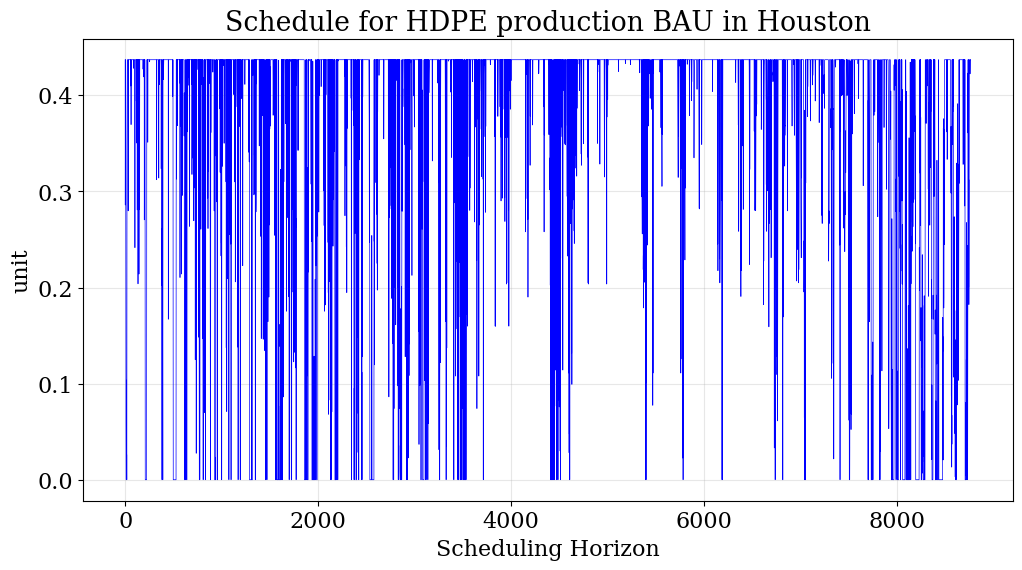

In [12]:
plot_results.schedule(results=results_gwp_6, y_axis= 'P', component= 'HDPE BAU', location='HO')

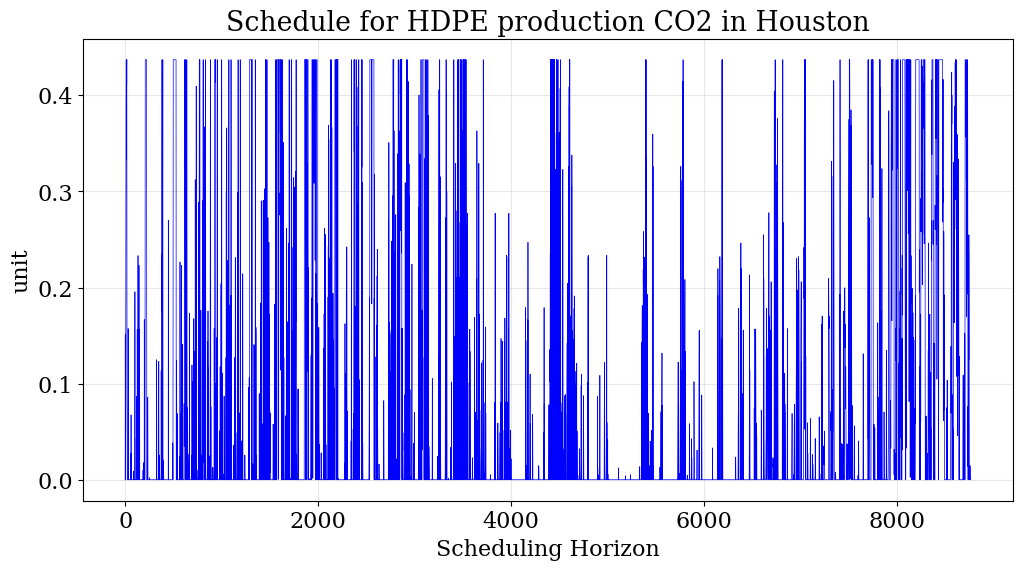

In [13]:
plot_results.schedule(results=results_gwp_6, y_axis= 'P', component= 'HDPE CO2', location='HO')

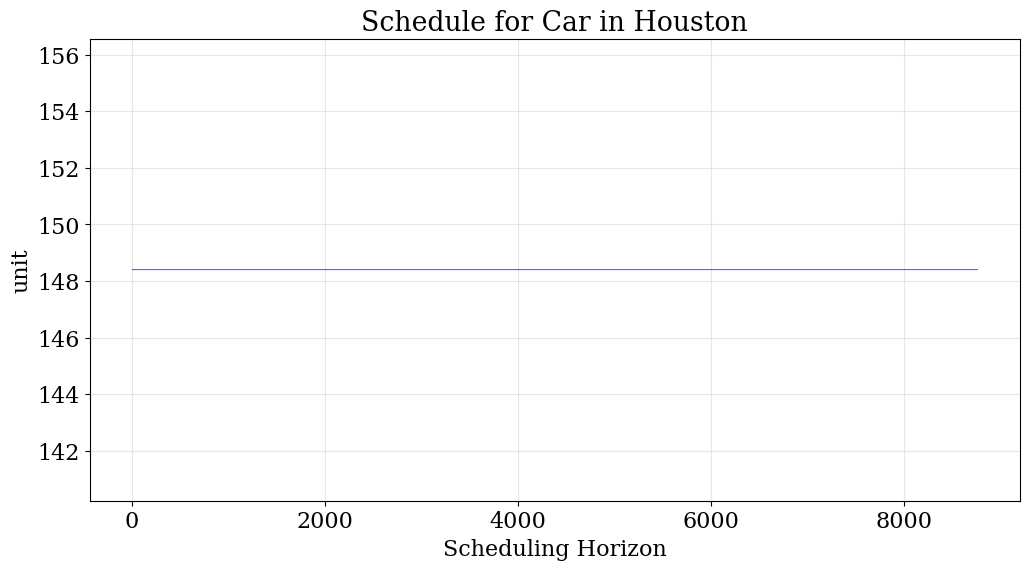

In [14]:
plot_results.schedule(results=results_gwp_6, y_axis= 'S', component= 'Car', location='HO')

In [15]:
results_cost.output['S_network']

{('C4 fraction', 0): 0.0,
 ('C5 fraction', 0): 0.0,
 ('CO2_Vent', 0): 6658.525518746452,
 ('Car', 0): 1299999.999999973,
 ('LPG', 0): 0.0,
 ('Propylene', 0): 0.0}

In [16]:
results_gwp_8.output['S_network']

{('C4 fraction', 0): 0.0,
 ('C5 fraction', 0): 0.0,
 ('CO2_Vent', 0): 5816.0021973325365,
 ('Car', 0): 1299999.999999973,
 ('LPG', 0): 0.0,
 ('Propylene', 0): 0.0}

In [17]:
results_gwp_max.output['S_network']

{('C4 fraction', 0): 0.0,
 ('C5 fraction', 0): 0.0,
 ('CO2_Vent', 0): 5346.160181749119,
 ('Car', 0): 1299999.999999973,
 ('LPG', 0): 0.0,
 ('Propylene', 0): 0.0}

In [18]:
2513917999999/163404673379

15.384615066475062

In [31]:
[i.output['global_warming_potential_network'][0]/i.output['S_network'][('Car', 0)] for i in results_list]

[11.083676305293448,
 10.862002779187579,
 10.64032925308171,
 10.418655726975842,
 10.196982200869973,
 10.077794087786275]

In [32]:
results_cost.output['S_network']

{('C4 fraction', 0): 0.0,
 ('C5 fraction', 0): 0.0,
 ('CO2_Vent', 0): 6658.525518746452,
 ('Car', 0): 1299999.999999973,
 ('LPG', 0): 0.0,
 ('Propylene', 0): 0.0}

In [ ]:
results_cost.output['S_network']

In [33]:
[i.output['S_network'][('CO2_Vent', 0)]/i.output['S_network'][('Car', 0)] for i in results_list]

[0.0051219427067281465,
 0.005062576950636076,
 0.004985934497203693,
 0.004807560712367838,
 0.004473847844102044,
 0.0041124309090378695]

In [28]:
results_cost.output['global_warming_potential_network'][0]

14408779.196881182

In [19]:
cost = [i.output['objective'] for i in results_list]

In [20]:
cost = [i*100/min(cost) for i in cost]

In [21]:
cost

[100.0,
 101.21134986978747,
 102.61102205413694,
 116.44076607398682,
 154.38427040619462,
 223.62724205530063]

In [22]:
gwp= [i.output['global_warming_potential_network'][0] for i in results_list]

In [23]:
gwp = [i/max(gwp) for i in gwp]

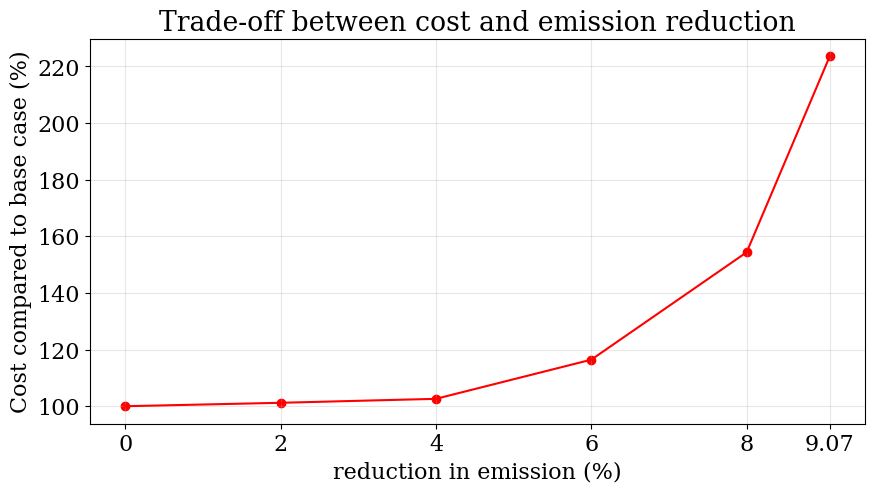

In [24]:
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize=(10,5))
y_ = cost
x_ = [0, 2, 4, 6, 8, 9.07]
ax.plot(x_, y_, color='red')
ax.scatter(x_, y_, color='red')
plt.title(f'Trade-off between cost and emission reduction')
plt.ylabel("Cost compared to base case (%)")
plt.xlabel("reduction in emission (%)")
ax.set_xticks(x_)
ax.set_xticklabels(x_)
plt.grid(alpha=0.3)
plt.rcdefaults()

In [34]:
results_cost.output['global_warming_potential_material']

{('HO', 'CO_2-Olefin production', 0): 0.0,
 ('HO', 'Compression molding', 0): 0.0,
 ('HO', 'DAC', 0): 0.0,
 ('HO', 'Extrusion', 0): 0.0,
 ('HO', 'HDPE BAU', 0): 0.0,
 ('HO', 'HDPE CO2', 0): 0.0,
 ('HO', 'Injection molding', 0): 0.0,
 ('HO', 'LiI', 0): 206078.0344943407,
 ('HO', 'LiI_d', 0): 0.0,
 ('HO', 'PV', 0): 0.0,
 ('HO', 'WF', 0): 2458040.8103281595,
 ('HO', 'car_prod', 0): 0.0}

In [24]:
[
  [i.output['global_warming_potential_material'][('HO', 'LiI', 0)] for i in results_list],
  [i.output['global_warming_potential_material'][('HO', 'WF', 0)] for i in results_list],
  [i.output['global_warming_potential_resource_consumption'][('HO', 'Natural Gas', 0)] for i in results_list],
  [i.output['global_warming_potential_resource_consumption'][('HO', 'Oil', 0)] for i in results_list],
  [i.output['global_warming_potential_resource_discharge'][('HO', 'CO2_Vent', 0)]for i in results_list] 
  ] 

[[140691.4444615116,
  154321.53183092162,
  153937.93048675952,
  193044.77754758202,
  344080.3915170005,
  526848.8239172742],
 [2458040.8103281595,
  2380663.4409507317,
  2382613.168256611,
  2729660.9955549473,
  3552029.153951385,
  4580628.917185124],
 [4103951.471118176,
  3986642.743552084,
  3835194.681881987,
  3482722.093175227,
  2823294.259255325,
  2109122.2590269246],
 [1047569.9522268848,
  1017625.860783059,
  978967.402015911,
  888995.6527124952,
  720670.8590744416,
  538372.1322434429],
 [6658525.5187464515,
  6581350.035826762,
  6481714.846364667,
  6249828.926078061,
  5816002.197332537,
  5346160.181749119]]

In [ ]:
        rc('font', **{'family': 'serif',
           'serif': ['Computer Modern'], 'size': font_size})
        rc('text', usetex=usetex)
        fig, ax = plt.subplots(figsize=fig_size)
        y_ = [100*results.output['Cap_P'][i]/results.components['processes'][i[1]]
              ['prod_max'] for i in results.output['Cap_P'].keys() if location in i]

        title = f"Capacity utilization in {results.components['locations'][location]['label']}"
        plt.ylabel("\%")
        # results.components['processes'][i[1]]['label']
        # x_ = [f"${i[1].split('_')[0]}_{{{i[1].split('_')[1]}}}$" for i in results.output[y_axis].keys() if location in i]
        x_ = [i[1] for i in results.output['Cap_P'].keys() if location in i]
        ax.bar(x_, y_, linewidth=0.5, color=color)
        plt.xticks(rotation=90)
        plt.grid(alpha=0.3)
        plt.title(title)
        plt.rcdefaults()

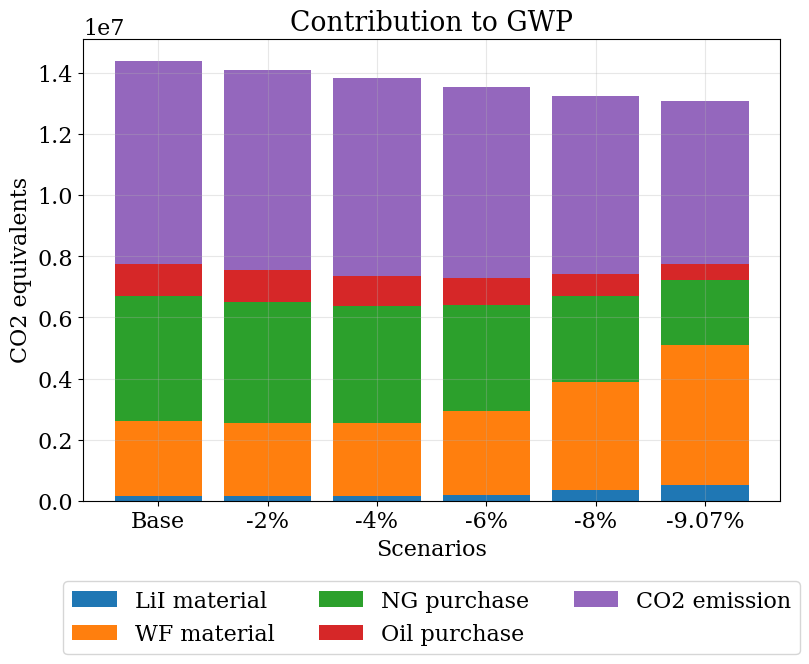

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

# Your data
data = [
    [140691.4444615116, 154321.53183092162, 153937.93048675952, 193044.77754758202, 344080.3915170005, 526848.8239172742],
    [2458040.8103281595, 2380663.4409507317, 2382613.168256611, 2729660.9955549473, 3552029.153951385, 4580628.917185124],
    [4103951.471118176, 3986642.743552084, 3835194.681881987, 3482722.093175227, 2823294.259255325, 2109122.2590269246],
    [1047569.9522268848, 1017625.860783059, 978967.402015911, 888995.6527124952, 720670.8590744416, 538372.1322434429],
    [6658525.5187464515, 6581350.035826762, 6481714.846364667, 6249828.926078061, 5816002.197332537, 5346160.181749119]
]

# Transpose the data for plotting
data_transposed = np.array(data)

# Create stacked bar plot
rc('font', **{'family': 'serif',
           'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize = (9,6))
bars = ax.bar(np.arange(len(data[0])), data_transposed[0], label='LiI material')
labels = ['WF material', 'NG purchase', 'Oil purchase', 'CO2 emission']
for i in range(1, len(data)):
    bars = ax.bar(np.arange(len(data[0])), data_transposed[i], bottom=np.sum(data_transposed[:i], axis=0), label=labels[i-1])

# Add labels, title, and legend
ax.set_xlabel('Scenarios')
ax.set_ylabel('CO2 equivalents')
ax.set_title('Contribution to GWP')

xtick_positions = np.arange(len(data[0]))
xtick_labels = ['Base', '-2%', '-4%', '-6%', '-8%', '-9.07%']
ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(zorder=0, alpha = 0.3)
plt.rcdefaults()

# Show the plot
plt.show()

In [ ]:


categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']

fig, ax = plt.subplots()

for i, values in enumerate(data):
    if i == 0:
        ax.bar(categories, values, label=f'Series {i+1}')
    else:
        ax.bar(categories, values, bottom=[sum(x) for x in zip(*data[:i])], label=f'Series {i+1}')

ax.set_ylabel('Values')
ax.set_title('Stacked Bar Plot')
ax.legend()

plt.show()

In [38]:
results_cost.output['global_warming_potential_resource_consumption'][('HO', 'Natural Gas', 0)]/results_cost.output['S_network'][('Car', 0)]

3.156885747014047

In [37]:
results_cost.output['global_warming_potential_resource_consumption'][('HO', 'Oil', 0)]/results_cost.output['S_network'][('Car', 0)]

0.8058230401745435

In [39]:
results_cost.output['global_warming_potential_resource_discharge'][('HO', 'CO2_Vent', 0)]/results_cost.output['S_network'][('Car', 0)]

5.121942706728146

In [46]:
(results_cost.output['global_warming_potential_resource_consumption'][('HO', 'Natural Gas', 0)]+ results_cost.output['global_warming_potential_resource_consumption'][('HO', 'Oil', 0)] + results_cost.output['global_warming_potential_resource_discharge'][('HO', 'CO2_Vent', 0)])/results_cost.output['S_network'][('Car', 0)] 

9.084651493916738

In [49]:
(results_cost.output['global_warming_potential_material'][('HO', 'LiI', 0)] )/results_cost.output['S_network'][('Car', 0)] 

0.10822418804731886

In [48]:
9.084651493916738 + 1.9990248113767115

11.08367630529345

In [19]:
results_gwp_8.output['global_warming_potential_resource_consumption']

{('HO', 'CO2_air', 0): 0.0,
 ('HO', 'Cooling water', 0): 0.0,
 ('HO', 'H2O', 0): 0.0,
 ('HO', 'Hydrogen', 0): 0.0,
 ('HO', 'Natural Gas', 0): 2823294.259255325,
 ('HO', 'Oil', 0): 720670.8590744416,
 ('HO', 'Oxygen', 0): 0.0,
 ('HO', 'Solar', 0): 0.0,
 ('HO', 'Steam', 0): 0.0,
 ('HO', 'Wind', 0): 0.0}

In [17]:
results_gwp_8.output['global_warming_potential_resource_discharge']

{('HO', 'C4 fraction', 0): 0.0,
 ('HO', 'C5 fraction', 0): 0.0,
 ('HO', 'CO2_Vent', 0): 5816002.197332537,
 ('HO', 'Car', 0): 0.0,
 ('HO', 'LPG', 0): 0.0,
 ('HO', 'Propylene', 0): 0.0}

In [18]:
results_gwp_8.output['S_network']

{('C4 fraction', 0): 0.0,
 ('C5 fraction', 0): 0.0,
 ('CO2_Vent', 0): 5816.0021973325365,
 ('Car', 0): 1299999.999999973,
 ('LPG', 0): 0.0,
 ('Propylene', 0): 0.0}

In [37]:
results_cost.output['global_warming_potential_resource_discharge']

{('HO', 'C4 fraction', 0): 0.0,
 ('HO', 'C5 fraction', 0): 0.0,
 ('HO', 'CO2_Vent', 0): 6658525.5187464515,
 ('HO', 'Car', 0): 0.0,
 ('HO', 'LPG', 0): 0.0,
 ('HO', 'Propylene', 0): 0.0}

In [38]:
results_cost.output['C_network']

{('CO2_air', 0): 0.0,
 ('Cooling water', 0): 0.0,
 ('H2O', 0): 0.0,
 ('Hydrogen', 0): 0.0,
 ('Natural Gas', 0): 3285.3137144402417,
 ('Oil', 0): 672.3005340353146,
 ('Oxygen', 0): 0.0,
 ('Solar', 0): 0.0,
 ('Steam', 0): 0.0,
 ('Wind', 0): 20247.561303947223}

In [40]:
results_gwp_6.output['global_warming_potential_resource_consumption']

{('HO', 'CO2_air', 0): 0.0,
 ('HO', 'Cooling water', 0): 0.0,
 ('HO', 'H2O', 0): 0.0,
 ('HO', 'Hydrogen', 0): 0.0,
 ('HO', 'Natural Gas', 0): 3499746.2687091455,
 ('HO', 'Oil', 0): 0.0,
 ('HO', 'Oxygen', 0): 0.0,
 ('HO', 'Solar', 0): 0.0,
 ('HO', 'Wind', 0): 0.0}

In [ ]:
results_gwp_6.output['global_warming_potential_resource_consumption']

In [84]:
em_material_gwp_6 = sum(results_gwp_6.output['global_warming_potential_material'].values())
em_resource_cons_gwp_6 = sum(results_gwp_6.output['global_warming_potential_resource_consumption'].values())
em_resource_disc_gwp_6 = sum(results_gwp_6.output['global_warming_potential_resource_discharge'].values())


In [85]:
em_material_gwp_9 = sum(results_gwp_9.output['global_warming_potential_material'].values())
em_resource_cons_gwp_9 = sum(results_gwp_9.output['global_warming_potential_resource_consumption'].values())
em_resource_disc_gwp_9 = sum(results_gwp_9.output['global_warming_potential_resource_discharge'].values())


In [86]:
em_material_cost = sum(results_cost.output['global_warming_potential_material'].values())
em_resource_cons_cost = sum(results_cost.output['global_warming_potential_resource_consumption'].values())
em_resource_disc_cost = sum(results_cost.output['global_warming_potential_resource_discharge'].values())

In [87]:
max_reduction = (results_cost.output['objective'] - results_gwp_9.output['objective'])/results_cost.output['objective']
max_reduction

-0.05602961461375217

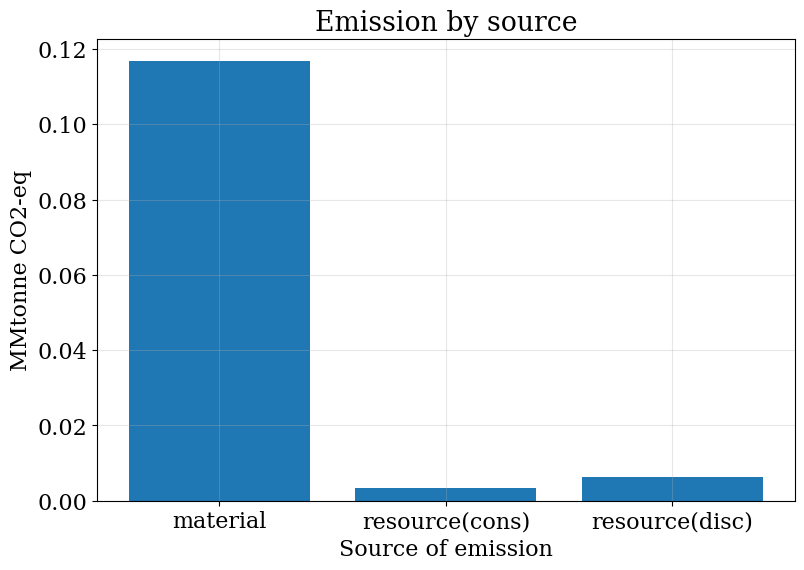

In [88]:
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize=(9,6))
# ax.plot(x_, y_, linewidth=0.5, color='red')
x_  = ['material', 'resource(cons)', 'resource(disc)']
y_ = [em_material_gwp_6/20, em_resource_cons_gwp_6, em_resource_disc_gwp_6]
y_ = [i/10**9 for i in y_]
ax.bar(x_, y_)
# ax.set_yscale('log')
plt.title(f'Emission by source')
plt.ylabel("MMtonne CO2-eq")
plt.xlabel("Source of emission")
plt.grid(alpha=0.3)
plt.rcdefaults()

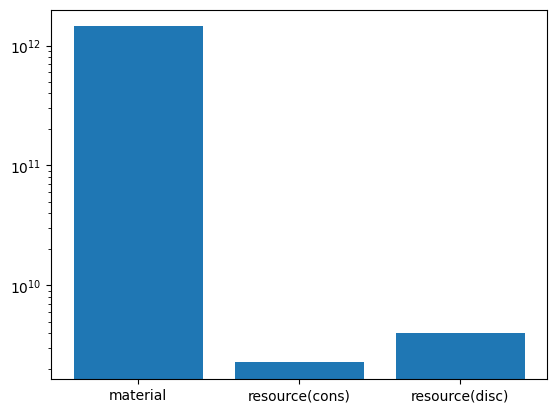

In [36]:
plt.bar(['material', 'resource(cons)', 'resource(disc)'], [em_material_gwp_9, em_resource_cons_gwp_9, em_resource_disc_gwp_9])
plt.yscale('log')

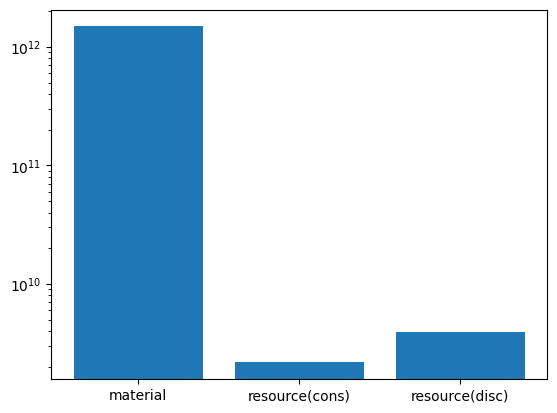

In [31]:
plt.bar(['material', 'resource(cons)', 'resource(disc)'], [em_material_gwp_6, em_resource_cons_gwp_6, em_resource_disc_gwp_6])
plt.yscale('log')

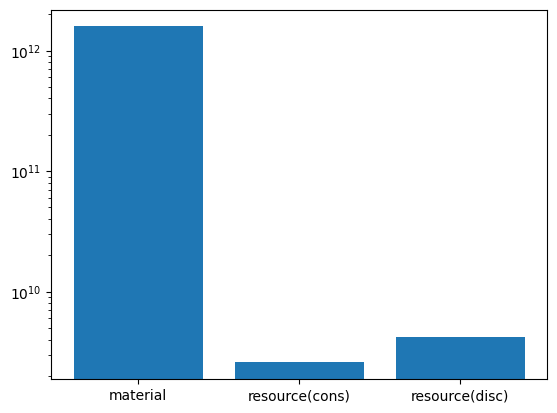

In [33]:
plt.bar(['material', 'resource(cons)', 'resource(disc)'], [em_material_cost, em_resource_cons_cost, em_resource_disc_cost])
plt.yscale('log')

In [12]:
results_cost.output['global_warming_potential_resource_discharge']

{('HO', 'C4 fraction', 0): 0.0,
 ('HO', 'C5 fraction', 0): 0.0,
 ('HO', 'CO2_Vent', 0): 4184746875.3198185,
 ('HO', 'LPG', 0): 0.0,
 ('HO', 'Miles', 0): 0.0,
 ('HO', 'Propylene', 0): 0.0}

In [14]:
results_gwp_6.output['global_warming_potential_resource_discharge']

{('HO', 'C4 fraction', 0): 0.0,
 ('HO', 'C5 fraction', 0): 0.0,
 ('HO', 'CO2_Vent', 0): 3919704122.5654783,
 ('HO', 'LPG', 0): 0.0,
 ('HO', 'Miles', 0): 0.0,
 ('HO', 'Propylene', 0): 0.0}

In [15]:
results_cost.output['S_network']

{('C4 fraction', 0): 0.0,
 ('C5 fraction', 0): 0.0,
 ('CO2_Vent', 0): 4184746.8753198185,
 ('LPG', 0): 0.0,
 ('Miles', 0): 163404673379.99988,
 ('Propylene', 0): 0.0}

In [17]:
results_gwp_6.output['S_network']

{('C4 fraction', 0): 81697.03362134685,
 ('C5 fraction', 0): 0.0,
 ('CO2_Vent', 0): 3919704.1225654786,
 ('LPG', 0): 40848.51681067343,
 ('Miles', 0): 163404673379.9999,
 ('Propylene', 0): 204242.58405336714}

In [48]:
results_cost.output['Cap_P']

{('HO', 'Adsorption', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 0): 0.0,
 ('HO', 'Compression molding', 0): 314.8126927250356,
 ('HO', 'Driving', 0): 96326114.00309223,
 ('HO', 'Extrusion', 0): 120.08319207037442,
 ('HO', 'HDPE production', 0): 1418.4356467019725,
 ('HO', 'Injection molding', 0): 863.3007862356646,
 ('HO', 'LiI', 0): 1122759.7482757,
 ('HO', 'LiI_d', 0): 714459.6655495723,
 ('HO', 'PV', 0): 0.0,
 ('HO', 'WF', 0): 5129980.878346685}

In [50]:
results_gwp_3.output['Cap_P']

{('HO', 'Adsorption', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 0): 0.0,
 ('HO', 'Compression molding', 0): 303.21764442724174,
 ('HO', 'Driving', 0): 92778271.20635921,
 ('HO', 'Extrusion', 0): 115.66033859595821,
 ('HO', 'HDPE production', 0): 1366.1924233158468,
 ('HO', 'Injection molding', 0): 831.5040558520237,
 ('HO', 'LiI', 0): 1286800.9661547744,
 ('HO', 'LiI_d', 0): 714459.6655495714,
 ('HO', 'PV', 0): 0.0,
 ('HO', 'WF', 0): 4938048.79602939}

In [72]:
results_gwp_6.output['global_warming_potential_material']

{('HO', 'Adsorption', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 0): 0.0,
 ('HO', 'Compression molding', 0): 0.0,
 ('HO', 'Driving', 0): 0.0,
 ('HO', 'Extrusion', 0): 0.0,
 ('HO', 'HDPE production', 0): 0.0,
 ('HO', 'Injection molding', 0): 0.0,
 ('HO', 'LiI', 0): 86595754962.07527,
 ('HO', 'LiI_d', 0): 0.0,
 ('HO', 'PV', 0): 0.0,
 ('HO', 'WF', 0): 1402390929275.246}

In [62]:
prod_ocm = [results_gwp_8.output['P'][('HO', 'ROCM',i , j, k)] for i, j, k in product(range(1), range(365), range(24))]

In [63]:
prod_bau = [results_gwp_8.output['P'][('HO', 'HDPE BAU',i , j, k)] for i, j, k in product(range(1), range(365), range(24))]

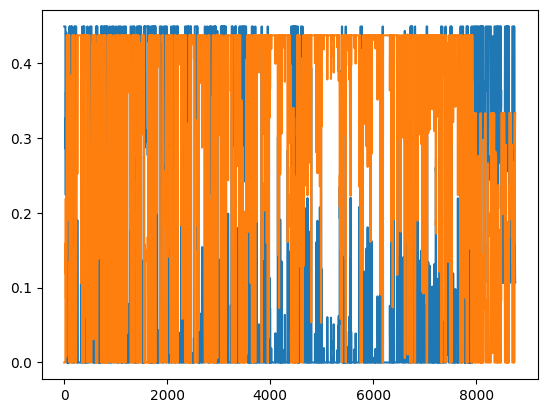

In [64]:
plt.plot(prod_ocm)
plt.plot(prod_bau)

In [76]:
prod_li = [results_gwp_8.output['P'][('HO', 'LiI_d',i , j, k)] for i, j, k in product(range(1), range(365), range(24))]

In [71]:
prod_wf = [results_gwp_8.output['P'][('HO', 'WF',i , j, k)] for i, j, k in product(range(1), range(365), range(24))]

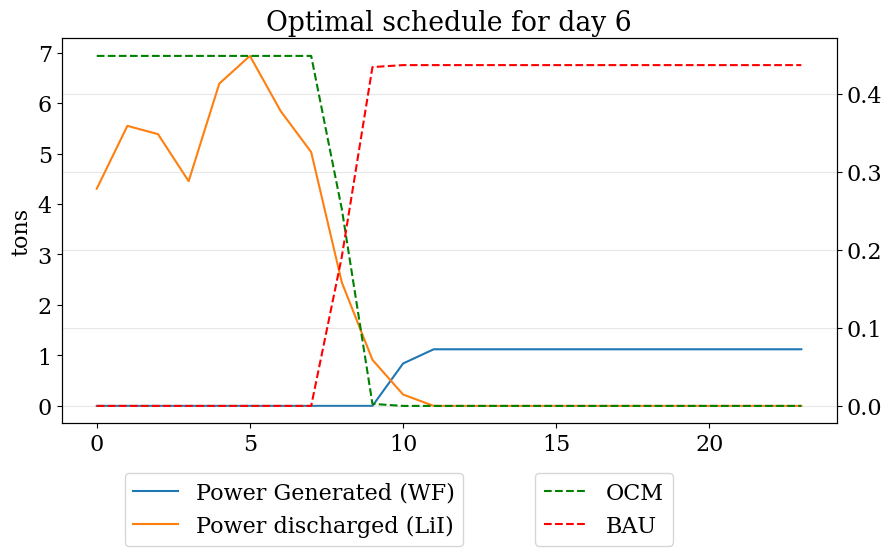

In [106]:
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(prod_li[24*6: 24*7], label = 'Power Generated (WF)')
ax.plot(prod_wf[24*6: 24*7], label = 'Power discharged (LiI)')
ax.set_ylabel("MW")

ax2 = ax.twinx()

ax2.plot(prod_ocm[24*6: 24*7], color = 'green', linestyle = '--' , label = 'OCM')
ax2.plot(prod_bau[24*6: 24*7], color = 'red', linestyle = '--', label = 'BAU')
ax.set_ylabel("tons")

plt.title(f'Optimal schedule for day 6')
plt.ylabel
plt.xlabel("Hour")
plt.grid(alpha=0.3)
ax.legend(loc='upper center', bbox_to_anchor=(0.3, -0.10), ncol=1)
ax2.legend(loc='upper center', bbox_to_anchor=(0.7, -0.10), ncol=1)

plt.rcdefaults()

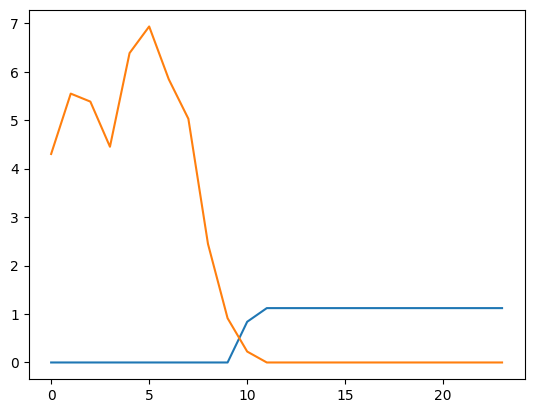

In [73]:
results_gwp_6.output['global_warming_potential_resource']

{('HO', 'C4 fraction', 0): 0.0,
 ('HO', 'C5 fraction', 0): 0.0,
 ('HO', 'CO2', 0): 0.0,
 ('HO', 'CO2_Vent', 0): 3919704122.5654783,
 ('HO', 'CO2_air', 0): 0.0,
 ('HO', 'Cooling water', 0): 0.0,
 ('HO', 'Ethylene', 0): 0.0,
 ('HO', 'H2O', 0): 0.0,
 ('HO', 'HDPE_CM', 0): 0.0,
 ('HO', 'HDPE_E', 0): 0.0,
 ('HO', 'HDPE_IM', 0): 0.0,
 ('HO', 'High density polyethylene', 0): 0.0,
 ('HO', 'Hydrogen', 0): 0.0,
 ('HO', 'LPG', 0): 0.0,
 ('HO', 'LiIPower', 0): 0.0,
 ('HO', 'Miles', 0): 0.0,
 ('HO', 'Natural Gas', 0): 2176377591.4086676,
 ('HO', 'Oil', 0): 0.0,
 ('HO', 'Oxygen', 0): 0.0,
 ('HO', 'Power', 0): 0.0,
 ('HO', 'Propylene', 0): 0.0,
 ('HO', 'Solar', 0): 0.0,
 ('HO', 'Wind', 0): 0.0}

In [53]:
(results_gwp_3.output['Cap_P'][('HO', 'LiI', 0)] - results_cost.output['Cap_P'][('HO', 'LiI', 0)])/results_cost.output['Cap_P'][('HO', 'LiI', 0)]

0.14610536059117177

In [54]:
(results_gwp_3.output['Cap_P'][('HO', 'WF', 0)] - results_cost.output['Cap_P'][('HO', 'WF', 0)])/results_cost.output['Cap_P'][('HO', 'WF', 0)]

-0.03741380072729477

In [61]:
results_gwp_6.output['Cap_P']

{('HO', 'Adsorption', 0): 6708.776719318552,
 ('HO', 'CO_2-Olefin production', 0): 1225.9278021671032,
 ('HO', 'Compression molding', 0): 257.005518340295,
 ('HO', 'Driving', 0): 78638325.04585136,
 ('HO', 'Extrusion', 0): 98.03303276897854,
 ('HO', 'HDPE production', 0): 1157.976781232879,
 ('HO', 'Injection molding', 0): 704.7780193661698,
 ('HO', 'LiI', 0): 1546352.7671799157,
 ('HO', 'LiI_d', 0): 714459.6655495714,
 ('HO', 'PV', 0): 0.0,
 ('HO', 'WF', 0): 4730328.573067571}

In [60]:
results_gwp_9.output['Cap_P']

{('HO', 'Adsorption', 0): 6274.728916766887,
 ('HO', 'CO_2-Olefin production', 0): 1148.0429944010525,
 ('HO', 'Compression molding', 0): 249.12197441432994,
 ('HO', 'Driving', 0): 76226125.12980741,
 ('HO', 'Extrusion', 0): 95.0259077662908,
 ('HO', 'HDPE production', 0): 1122.4562956065367,
 ('HO', 'Injection molding', 0): 683.1592288063068,
 ('HO', 'LiI', 0): 2157254.053948873,
 ('HO', 'LiI_d', 0): 714459.6655495714,
 ('HO', 'PV', 0): 0.0,
 ('HO', 'WF', 0): 4453400.826795594}